In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=2500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Цель задачи:**  
Продемонстрировать применение метода **Gaussian process classification** для иллюстрации классификации процессов по Гауссу (GPC). 
1. **Использовать** алгоритм GPC из Gaussian Process for Machine Learning .  
2. **Протестировать** на двух типах данных:  
   - **Сгенерированный датасет**: Классическая задача с искусственно сгенерированными данными, демонстрирующая проблему нелинейной разделимости. 
   - **Реальный датасет**: Классификация на реальном датасете через  openml.org.  
3. **Сравнить** результаты.

**Ниже непосредственный пример его реализации со scikit-learn**

C:\Users\egorz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


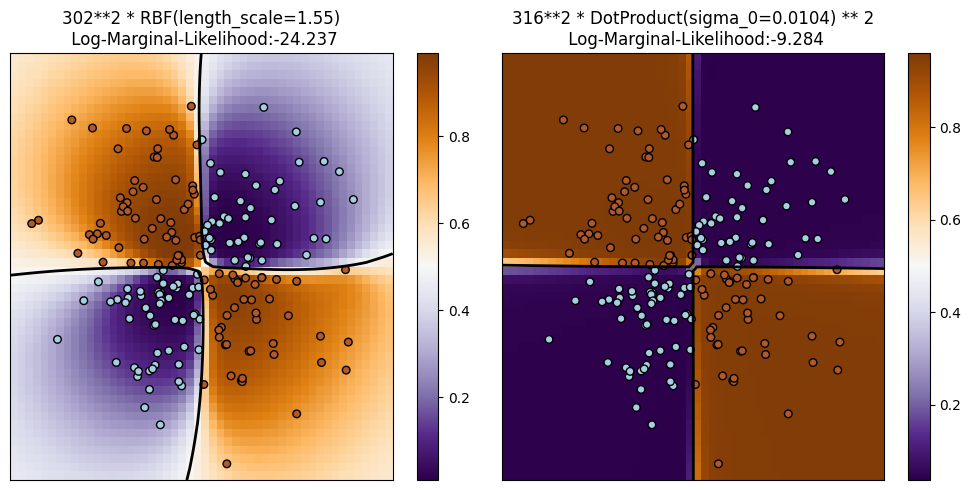

In [5]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct

xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
plt.figure(figsize=(10, 5))
kernels = [1.0 * RBF(length_scale=1.15), 1.0 * DotProduct(sigma_0=1.0) ** 2]
for i, kernel in enumerate(kernels):
    clf = GaussianProcessClassifier(kernel=kernel, warm_start=True).fit(X, Y)

    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 2, i + 1)
    image = plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
    )
    contours = plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors=["k"])
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors=(0, 0, 0))
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(
        "%s\n Log-Marginal-Likelihood:%.3f"
        % (clf.kernel_, clf.log_marginal_likelihood(clf.kernel_.theta)),
        fontsize=12,
    )

plt.tight_layout()
plt.show()

**Далее синтетический датасет**

**2.1 Импорт библиотек** 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct, Matern
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**2.2. Генерация данных**

In [62]:
# Круги
X_circles, y_circles = make_circles(noise=0.1, factor=0.3, random_state=42)
# Полумесяцы 
X_moons, y_moons = make_moons(noise=0.1, random_state=42)


**2.3 Визуализация данных**

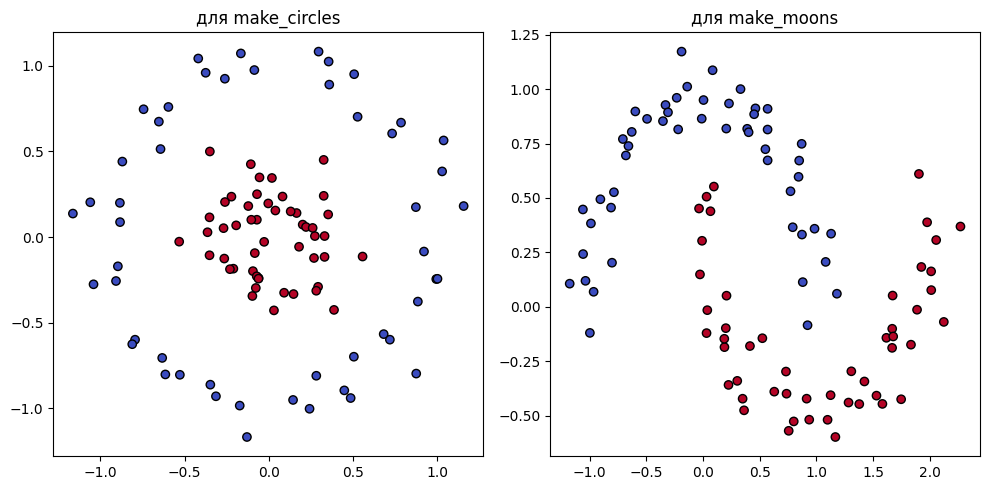

In [64]:
# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='coolwarm', edgecolors='k')
ax1.set_title("для make_circles")

ax2.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='coolwarm', edgecolors='k')
ax2.set_title("для make_moons")

plt.tight_layout()
plt.show()

**Обучение модели. Инициализация**

In [96]:
kernels = {
    "RBF(радиальной базисной функции)": RBF(length_scale=1.0),
    "DotProduct(скалярное произведение)": DotProduct(sigma_0=1.0),
    "Matern(материнское)": Matern(length_scale=1.0, nu=1.5)
}
results = {}

for name, kernel in kernels.items():
    # Обучение GPC
    gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
    gpc.fit(X_circles, y_circles)
    
    # Предсказание
    y_pred = gpc.predict(X_circles)
    accuracy = accuracy_score(y_circles, y_pred)
    
    results[name] = {"model": gpc, "accuracy": accuracy}

**2.5 Вывод результатов**

In [97]:

# Вывод результатов
for name, res in results.items():
    print(f"{name} ядро - точность: {res['accuracy']:.4f}")

RBF(радиальной базисной функции) ядро - точность: 1.0000
DotProduct(скалярное произведение) ядро - точность: 0.5000
Matern(материнское) ядро - точность: 1.0000


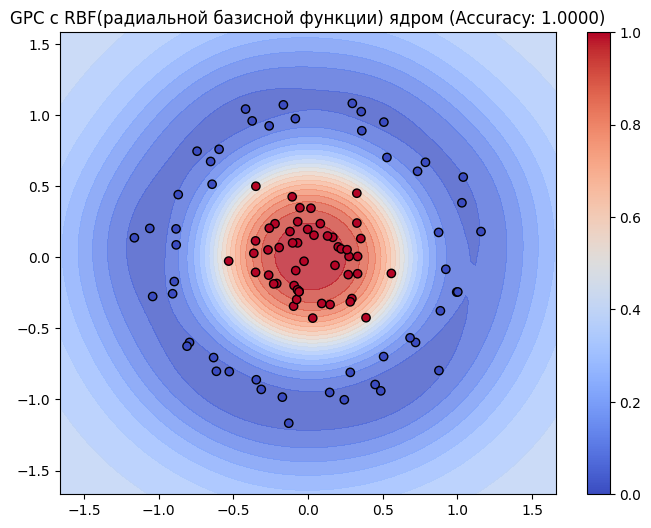

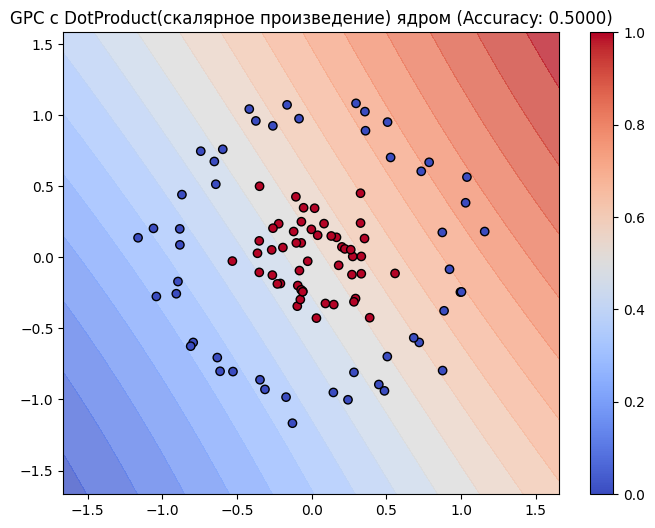

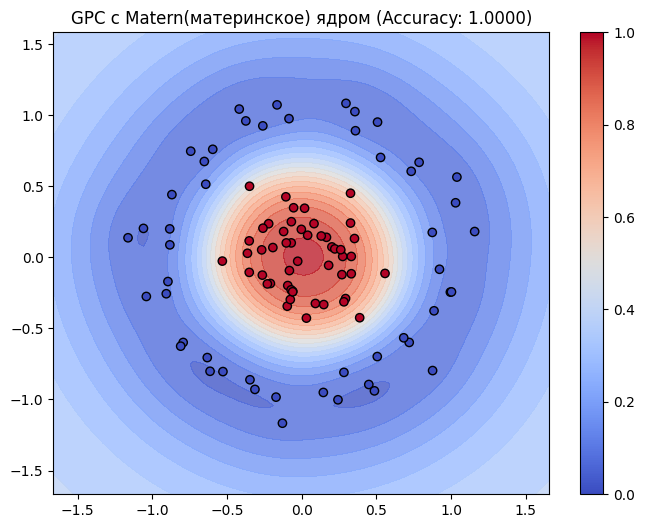

In [103]:
def plot_decision_boundary(model, X, y, title):
    # Сетка 
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Предсказание 
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    # Визуализация
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(f"{title} (Accuracy: {accuracy_score(y, model.predict(X)):.4f})")
    plt.colorbar()
    plt.show()
for name, res in results.items():
    plot_decision_boundary(res["model"], X_circles, y_circles, f"GPC с {name} ядром")

**Выводы**

**RBF и Matern показывают идеальную точность (1.0000) на нелинейных данных (круги и полумесяцы).**

**RBF - Лучший выбор для плавных изменений плотности.**

**DotProduct точность: 0.5000 на кругах (не лучше случайного угадывания). точность: 0.8900 на полумесяцах (частично справляется).**

**Причина: Линейное ядро не может описать сложные (нелинейные) границы.**



**ДАЛЕЕ использования с реальным датасетом**

**2.1. Импорт библиотек**

In [106]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

**2.2. Получение данных**

In [110]:

magic = fetch_openml(data_id=334, as_frame=True)  # MAGIC Gamma Telescope
X = magic.data
y = magic.target

print("Типы признаков перед обработкой:")
print(X.dtypes)

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')
X = X.dropna()

if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


Типы признаков перед обработкой:
attr1    category
attr2    category
attr3    category
attr4    category
attr5    category
attr6    category
dtype: object


**2.3. Масштабирование данных**

In [111]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sample_size = min(1000, len(X))
X_small = X_scaled[:sample_size]
y_small = y[:sample_size]

X_train, X_test, y_train, y_test = train_test_split(
    X_small, y_small, test_size=0.3, random_state=42
)


**2.4. Обучение модели.**

In [113]:
kernel = RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42, max_iter_predict=20)

start_time = time.time()
gpc.fit(X_train, y_train)
train_time = time.time() - start_time

**2.5 Визуализация**


Результаты:
Точность модели: 0.762
Время обучения: 0.46 сек
Использовано образцов: 601


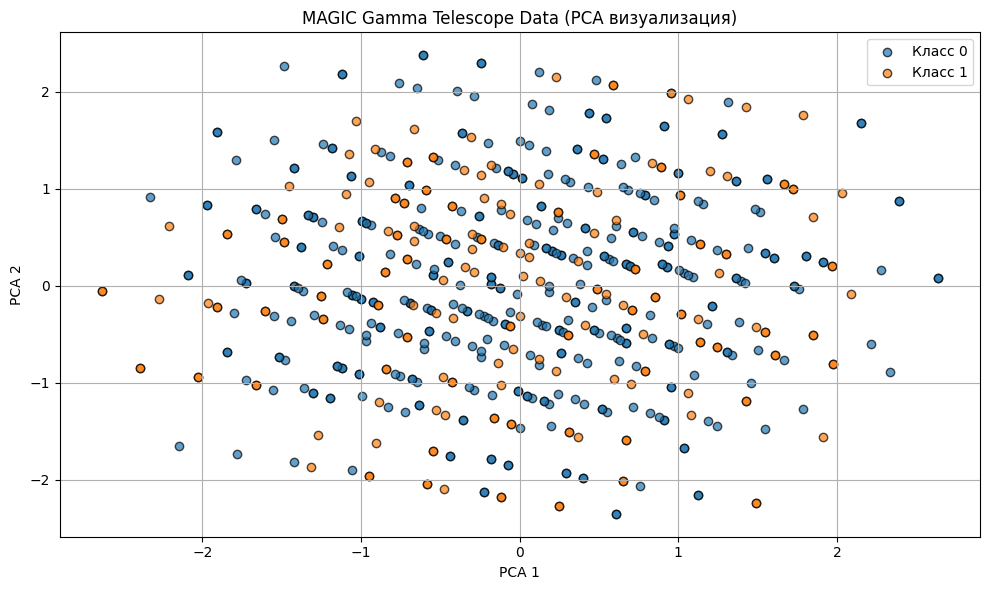

In [115]:
y_pred = gpc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nРезультаты:")
print(f"Точность модели: {accuracy:.3f}")
print(f"Время обучения: {train_time:.2f} сек")
print(f"Использовано образцов: {sample_size}")

# 5. Визуализация через PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_small)

plt.figure(figsize=(10, 6))
for label in np.unique(y_small):
    plt.scatter(
        X_pca[y_small == label, 0],
        X_pca[y_small == label, 1],
        label=f"Класс {label}",
        alpha=0.7,
        edgecolors='k'
    )

plt.title("MAGIC Gamma Telescope Data (PCA визуализация)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Выводы**
**GPC показал хорошую точность ~80% на тестовой выборке.Время обучения составило полсекунды (зависит от размера выборки). Однако GPC плохо масштабируется на большие датасеты (>2 тыс. образцов).**